# 금융통계시스템 데이터 탐색

## 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 백엔드 설정

In [2]:
plt.ioff()

## 데이터 불러오기

In [3]:
df_origin = pd.read_csv('./data/kb_liquidity_201703-202209.csv')

In [4]:
df_origin.shape

(9, 30)

In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   회사명        9 non-null      object
 1   회사코드       9 non-null      int64 
 2   보고서명       9 non-null      object
 3   보고서코드      9 non-null      object
 4   항목         9 non-null      object
 5   factor_id  9 non-null      object
 6   단위         9 non-null      object
 7   2017년03월   6 non-null      object
 8   2017년06월   6 non-null      object
 9   2017년09월   6 non-null      object
 10  2017년12월   6 non-null      object
 11  2018년03월   9 non-null      object
 12  2018년06월   9 non-null      object
 13  2018년09월   9 non-null      object
 14  2018년12월   9 non-null      object
 15  2019년03월   9 non-null      object
 16  2019년06월   9 non-null      object
 17  2019년09월   9 non-null      object
 18  2019년12월   9 non-null      object
 19  2020년03월   9 non-null      object
 20  2020년06월   9 non-null      object
 2

In [6]:
df_origin.sample(5)

,회사명,회사코드,보고서명,보고서코드,항목,factor_id,단위,2017년03월,2017년06월,2017년09월,...,2020년06월,2020년09월,2020년12월,2021년03월,2021년06월,2021년09월,2021년12월,2022년03월,2022년06월,2022년09월
0,국민은행,10927,유동성(유동성),SDSA018V,업무용고정자산비율,F000001222,%,14.74,14.41,13.72,...,11.92,11.90,11.43,11.03,10.60,10.18,10.25,10.09,9.85,9.60
6,국민은행,10927,유동성(유동성),SDSA018V,순안정자금조달비율,F000001231,%,NaN,NaN,NaN,...,112.39,113.50,115.92,114.52,116.06,114.83,114.17,110.82,109.84,109.37
8,국민은행,10927,유동성(유동성),SDSA018V,순안정자금조달비율_안정자금조달필요금액,F000001233,백만원,NaN,NaN,NaN,...,"244,337,637","254,659,220","255,007,504","255,350,896","255,716,476","266,675,160","274,209,360","278,708,208","285,558,660","296,941,825"
1,국민은행,10927,유동성(유동성),SDSA018V,업무용고정자산비율_업무용고정자산,F000001223,백만원,"3,813,941","3,788,014","3,696,119",...,"3,924,086","3,966,454","3,924,545","3,891,467","3,852,335","3,857,604","3,802,005","3,779,834","3,721,371","3,685,415"
5,국민은행,10927,유동성(유동성),SDSA018V,유동성커버리지비율_순현금유출액,F000001227,백만원,"34,028,799","37,252,093","41,642,500",...,"58,176,554","64,628,778","63,268,102","62,848,963","67,020,198","71,363,735","71,441,038","70,181,201","69,715,787","73,588,047"


In [7]:
df_origin.T

,0,1,2,3,4,5,6,7,8
회사명,국민은행,국민은행,국민은행,국민은행,국민은행,국민은행,국민은행,국민은행,국민은행
회사코드,10927,10927,10927,10927,10927,10927,10927,10927,10927
보고서명,유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성),유동성(유동성)
보고서코드,SDSA018V,SDSA018V,SDSA018V,SDSA018V,SDSA018V,SDSA018V,SDSA018V,SDSA018V,SDSA018V
항목,업무용고정자산비율,업무용고정자산비율_업무용고정자산,업무용고정자산비율_자기자본,유동성커버리지비율,유동성커버리지비율_총 고유동성자산,유동성커버리지비율_순현금유출액,순안정자금조달비율,순안정자금조달비율_안정자금가용금액,순안정자금조달비율_안정자금조달필요금액
factor_id,F000001222,F000001223,F000001224,F000001225,F000001226,F000001227,F000001231,F000001232,F000001233
단위,%,백만원,백만원,%,백만원,백만원,%,백만원,백만원
2017년03월,14.74,"3,813,941","25,877,980",109.67,"37,320,332","34,028,799",NaN,NaN,NaN
2017년06월,14.41,"3,788,014","26,287,425",103.99,"38,737,306","37,252,093",NaN,NaN,NaN
2017년09월,13.72,"3,696,119","26,940,022",95.54,"39,783,521","41,642,500",NaN,NaN,NaN


## 데이터 전처리

In [8]:
df_pre = df_origin.copy(deep=True)

In [9]:
df_pre = df_pre.drop(columns=['회사명', '회사코드', '보고서명', '보고서코드', 'factor_id'])

In [10]:
df_pre['항목2'] = pd.Series([_[-1] for _ in df_pre['항목'].str.split('_')])

In [11]:
df_pre['항목(단위)'] = df_pre['항목2'] + ' (' + df_pre['단위'] + ')'

In [12]:
df_pre = df_pre.drop(columns=['항목', '단위', '항목2'])

In [13]:
df_pre = df_pre.set_index('항목(단위)')

In [14]:
df_pre = df_pre.T

In [15]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2017년03월 to 2022년09월
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   업무용고정자산비율 (%)     23 non-null     object
 1   업무용고정자산 (백만원)     23 non-null     object
 2   자기자본 (백만원)        23 non-null     object
 3   유동성커버리지비율 (%)     23 non-null     object
 4   총 고유동성자산 (백만원)    23 non-null     object
 5   순현금유출액 (백만원)      23 non-null     object
 6   순안정자금조달비율 (%)     19 non-null     object
 7   안정자금가용금액 (백만원)    19 non-null     object
 8   안정자금조달필요금액 (백만원)  19 non-null     object
dtypes: object(9)
memory usage: 1.8+ KB


In [16]:
# df_pre = df_pre.fillna('0')

In [17]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2017년03월 to 2022년09월
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   업무용고정자산비율 (%)     23 non-null     object
 1   업무용고정자산 (백만원)     23 non-null     object
 2   자기자본 (백만원)        23 non-null     object
 3   유동성커버리지비율 (%)     23 non-null     object
 4   총 고유동성자산 (백만원)    23 non-null     object
 5   순현금유출액 (백만원)      23 non-null     object
 6   순안정자금조달비율 (%)     19 non-null     object
 7   안정자금가용금액 (백만원)    19 non-null     object
 8   안정자금조달필요금액 (백만원)  19 non-null     object
dtypes: object(9)
memory usage: 1.8+ KB


In [18]:
df_pre

항목(단위),업무용고정자산비율 (%),업무용고정자산 (백만원),자기자본 (백만원),유동성커버리지비율 (%),총 고유동성자산 (백만원),순현금유출액 (백만원),순안정자금조달비율 (%),안정자금가용금액 (백만원),안정자금조달필요금액 (백만원)
2017년03월,14.74,"3,813,941","25,877,980",109.67,"37,320,332","34,028,799",NaN,NaN,NaN
2017년06월,14.41,"3,788,014","26,287,425",103.99,"38,737,306","37,252,093",NaN,NaN,NaN
2017년09월,13.72,"3,696,119","26,940,022",95.54,"39,783,521","41,642,500",NaN,NaN,NaN
2017년12월,13.96,"3,712,075","26,590,641",100.00,"43,946,981","43,946,936",NaN,NaN,NaN
2018년03월,13.58,"3,699,067","27,238,316",104.34,"45,988,404","44,077,488",122.10,"235,516,381","192,889,088"
2018년06월,13.11,"3,697,579","28,211,691",101.79,"47,275,474","46,444,840",121.50,"240,136,281","197,649,724"
2018년09월,13.04,"3,767,671","28,890,783",98.02,"47,241,357","48,193,666",120.12,"244,215,467","203,313,085"
2018년12월,13.42,"3,830,834","28,546,209",102.20,"49,574,578","48,508,462",121.66,"248,330,155","204,115,969"
2019년03월,13.29,"3,864,212","29,086,533",102.49,"51,305,757","50,059,433",118.91,"245,227,026","206,224,120"
2019년06월,13.12,"3,924,633","29,917,587",102.76,"51,286,008","49,910,425",118.15,"246,893,639","208,973,841"


In [19]:
for col in df_pre.columns:
    if '%' in col:
        df_pre[col] = df_pre[col].astype('float')
#     else:
#         df_pre[col] = df_pre[col].str.replace(',', '').astype('int')

In [20]:
df_pre

항목(단위),업무용고정자산비율 (%),업무용고정자산 (백만원),자기자본 (백만원),유동성커버리지비율 (%),총 고유동성자산 (백만원),순현금유출액 (백만원),순안정자금조달비율 (%),안정자금가용금액 (백만원),안정자금조달필요금액 (백만원)
2017년03월,14.74,"3,813,941","25,877,980",109.67,"37,320,332","34,028,799",NaN,NaN,NaN
2017년06월,14.41,"3,788,014","26,287,425",103.99,"38,737,306","37,252,093",NaN,NaN,NaN
2017년09월,13.72,"3,696,119","26,940,022",95.54,"39,783,521","41,642,500",NaN,NaN,NaN
2017년12월,13.96,"3,712,075","26,590,641",100.00,"43,946,981","43,946,936",NaN,NaN,NaN
2018년03월,13.58,"3,699,067","27,238,316",104.34,"45,988,404","44,077,488",122.10,"235,516,381","192,889,088"
2018년06월,13.11,"3,697,579","28,211,691",101.79,"47,275,474","46,444,840",121.50,"240,136,281","197,649,724"
2018년09월,13.04,"3,767,671","28,890,783",98.02,"47,241,357","48,193,666",120.12,"244,215,467","203,313,085"
2018년12월,13.42,"3,830,834","28,546,209",102.20,"49,574,578","48,508,462",121.66,"248,330,155","204,115,969"
2019년03월,13.29,"3,864,212","29,086,533",102.49,"51,305,757","50,059,433",118.91,"245,227,026","206,224,120"
2019년06월,13.12,"3,924,633","29,917,587",102.76,"51,286,008","49,910,425",118.15,"246,893,639","208,973,841"


## 유동성 커버리지 비율

### 총 고유동성자산, 순현금유출액 시각화

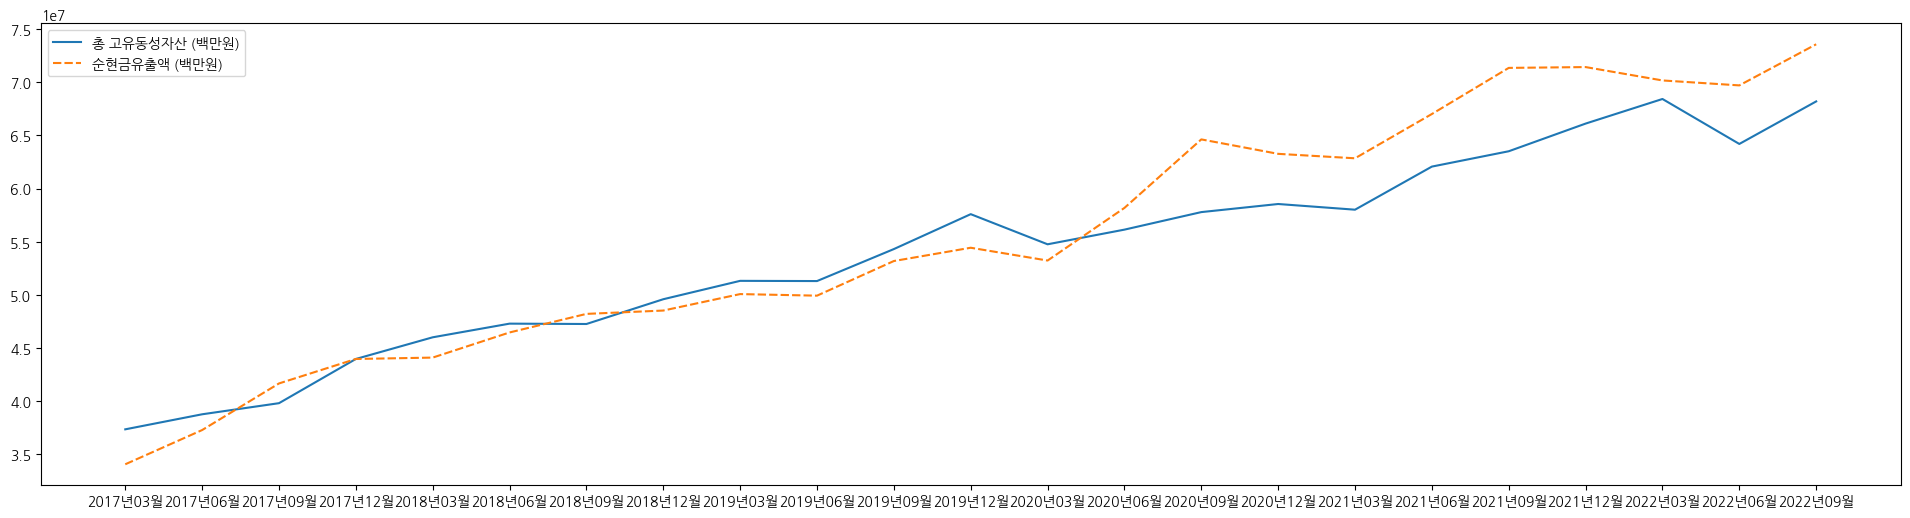

In [21]:
plt.figure(figsize=(24, 6))
sns.lineplot(
    data=pd.concat([
        df_pre['총 고유동성자산 (백만원)'].dropna().str.replace(',', '').astype(int),
        df_pre['순현금유출액 (백만원)'].dropna().str.replace(',', '').astype(int)
    ], axis=1)
)
plt.show()

### 유동성커버리지비율 시각화

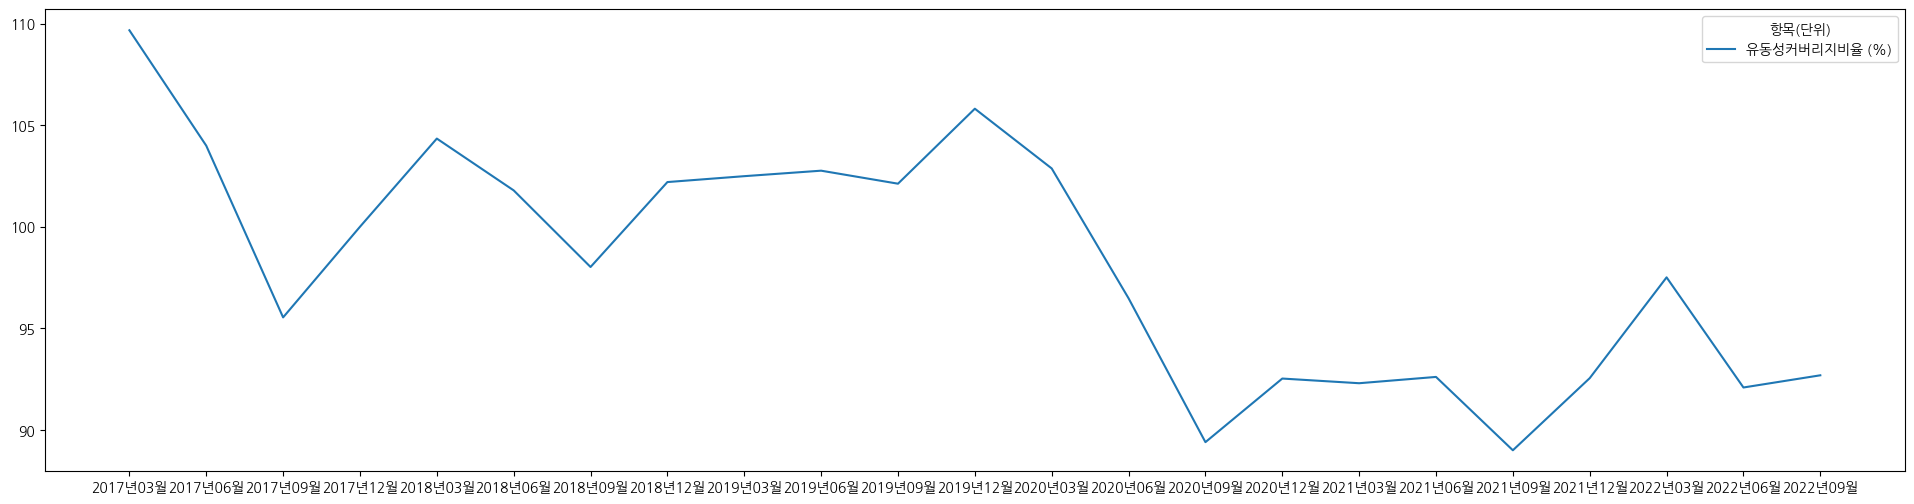

In [22]:
plt.figure(figsize=(24, 6))
sns.lineplot(
    data=df_pre[['유동성커버리지비율 (%)']]
)
plt.show()

## 순안정자금조달비율 (NSFR)

### 안정자금가용금액, 안정자금조달필요금액 시각화

In [23]:
pd.concat([
    df_pre['안정자금가용금액 (백만원)'].dropna().str.replace(',', '').astype(int),
    df_pre['안정자금조달필요금액 (백만원)'].dropna().str.replace(',', '').astype(int)
], axis=1)

,안정자금가용금액 (백만원),안정자금조달필요금액 (백만원)
2018년03월,235516381,192889088
2018년06월,240136281,197649724
2018년09월,244215467,203313085
2018년12월,248330155,204115969
2019년03월,245227026,206224120
2019년06월,246893639,208973841
2019년09월,255350495,212135147
2019년12월,266843257,219983321
2020년03월,266996600,234504633
2020년06월,274613742,244337637


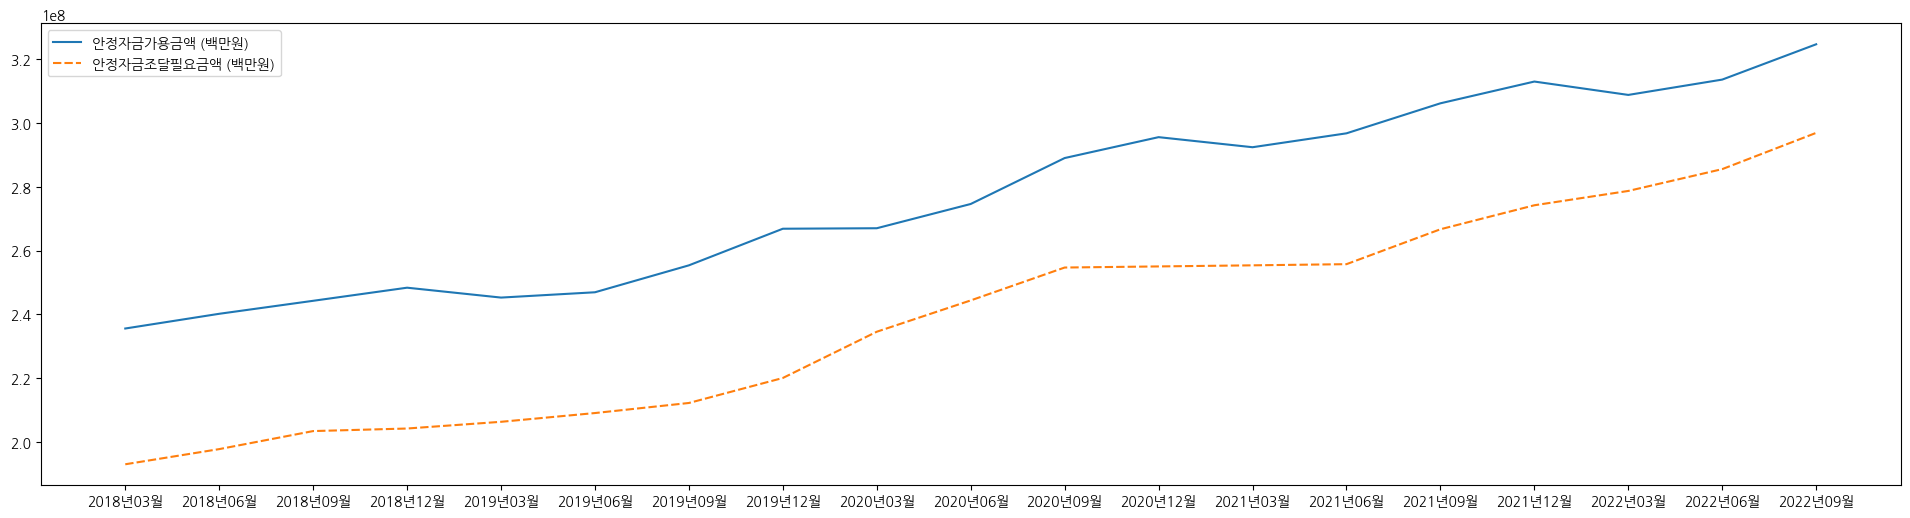

In [24]:
plt.figure(figsize=(24, 6))
sns.lineplot(
    data=pd.concat([
        df_pre['안정자금가용금액 (백만원)'].dropna().str.replace(',', '').astype(int),
        df_pre['안정자금조달필요금액 (백만원)'].dropna().str.replace(',', '').astype(int)
    ], axis=1)
)
plt.show()

### 순안정자금조달비율 시각화

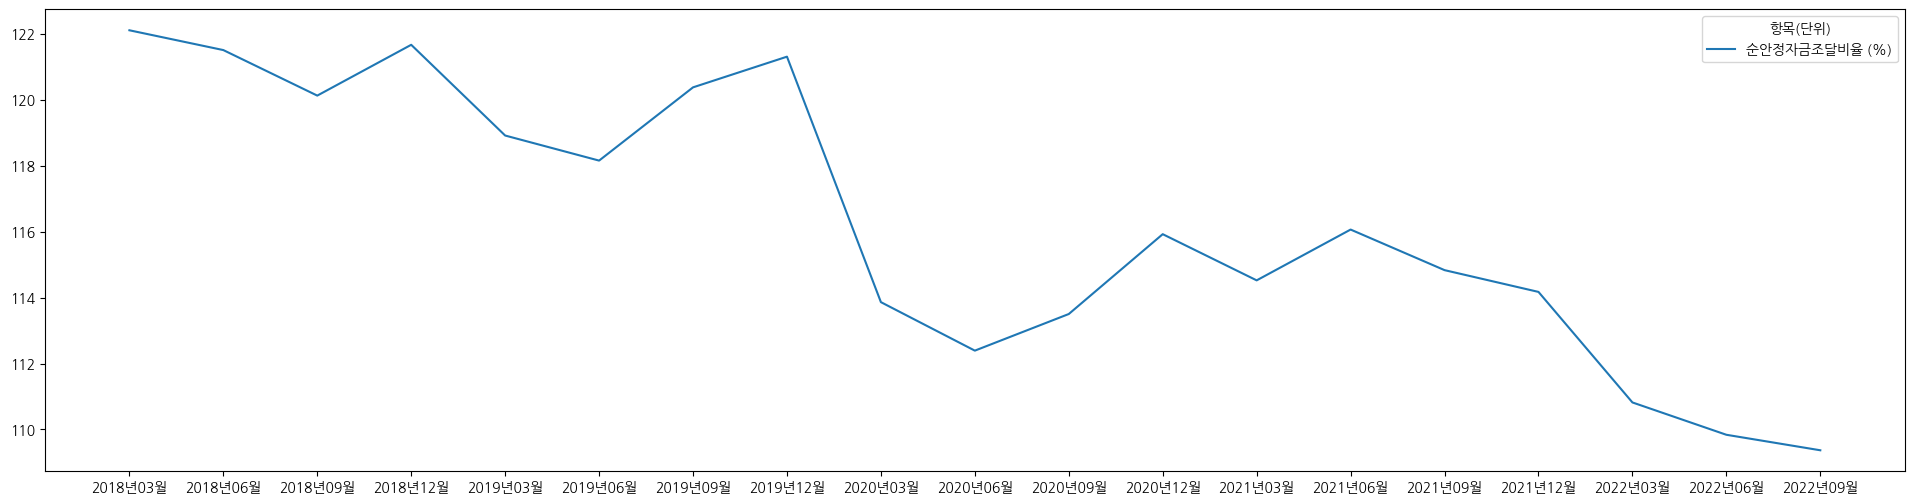

In [25]:
plt.figure(figsize=(24, 6))
sns.lineplot(
    data=df_pre[['순안정자금조달비율 (%)']]
)
plt.show()

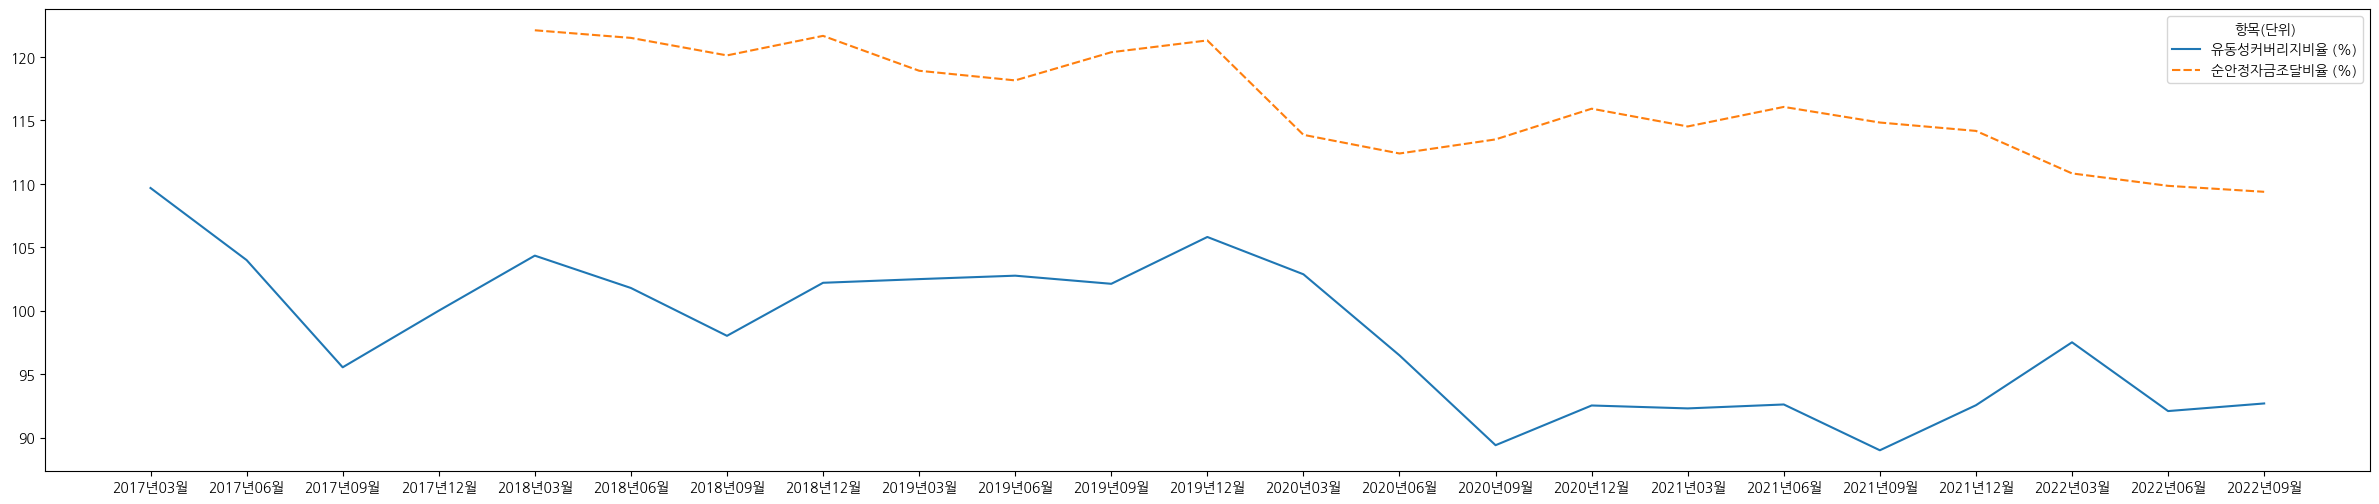

In [26]:
plt.figure(figsize=(30, 6))
sns.lineplot(
    data=df_pre[['유동성커버리지비율 (%)', '순안정자금조달비율 (%)']]
)
plt.show()